# Emotion and Reason in Political Language: Examining the UN General speeches
## Script 2: Descriptives
### by Sarah Franzen

### Description: 
#### -

## Descriptive Plots

In [127]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import joblib
import pandas as pd
from wordcloud import WordCloud

# === Set Working Directory ===

# Set your working directory (adjust this as needed)
wd = r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit"
os.chdir(wd)

# === Define Folder Paths ===

# Make sure that you have these folders in your working directory
data_c = os.path.join(wd, 'data')
data_temp = os.path.join(data_c, 'temp')
data_freq = os.path.join(data_c, 'freq')
fig_dir = os.path.join(wd, 'fig')

word_counts_stemmed = joblib.load(os.path.join(data_freq, 'word_counts_stemmed.pkl'))
word_counts_wordcloud = joblib.load(os.path.join(data_freq, 'word_counts_wordcloud.pkl'))


################ FIXXXXX un_corpus_scored alsow when loading!!!

un_corpus_scored = pd.read_csv(
    os.path.join(data_c, "un_corpus_merged_with_scores.csv"),
    sep=';', 
    encoding='utf-8'
)

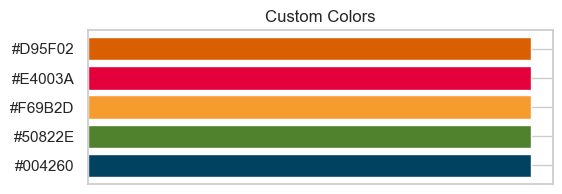

In [128]:
# Create custom palette

custom_colors = ['#004260', '#50822E', '#F69B2D', '#E4003A', '#D95F02'] 
custom_cmap = ListedColormap(custom_colors)


# Plot the individual colors as horizontal bars
plt.figure(figsize=(6, 2))
for i, color in enumerate(custom_colors):
    plt.barh(y=i, width=1, color=color)
plt.yticks(range(len(custom_colors)), custom_colors)
plt.xticks([])
plt.title("Custom Colors")
plt.show()


### Graph 1: Quantity of speeches by year

Sample size: 10760


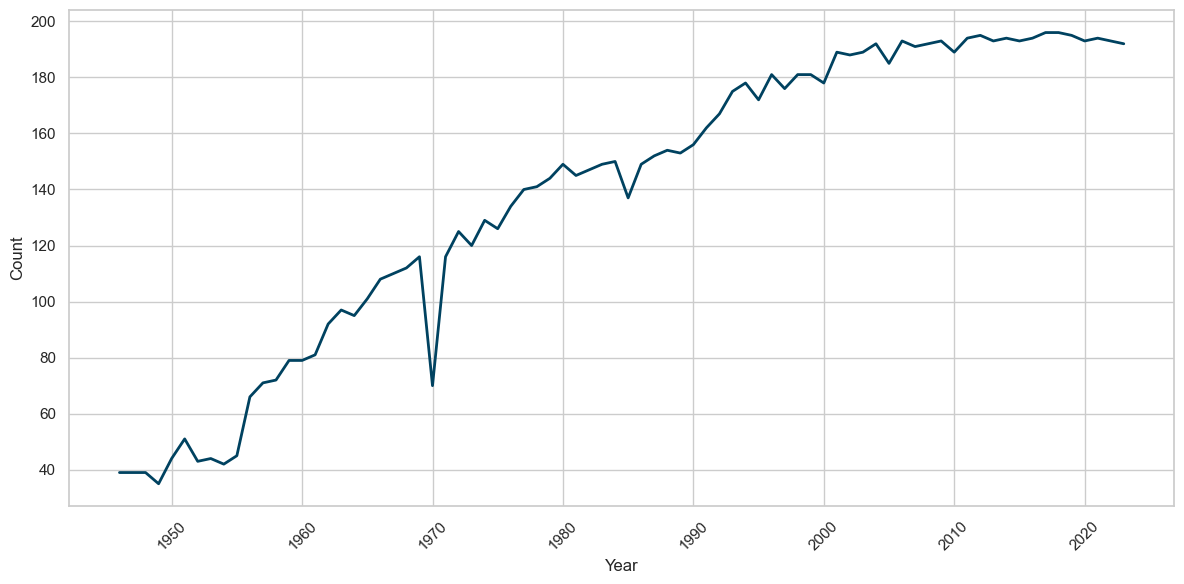

In [130]:
sns.set_style("whitegrid")

# Count of entries per year
year_counts = un_corpus_scored['year'].value_counts().sort_index()

# Print total sample size
total_n = year_counts.sum()
print(f"Sample size: {total_n}")

plt.figure(figsize=(12, 6))
sns.lineplot(
    x=year_counts.index,
    y=year_counts.values,
    marker=None,
    color='#004260',
    linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Count")

# X-axis: fixed ticks every 10 years from 1950 to 2020
tick_years = list(range(1950, 2021, 10))
plt.xticks(tick_years, tick_years, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(fig_dir, 'entries_by_year.png'))
plt.show()


### Graphs 2 & 3 : Quantity of speeches by country

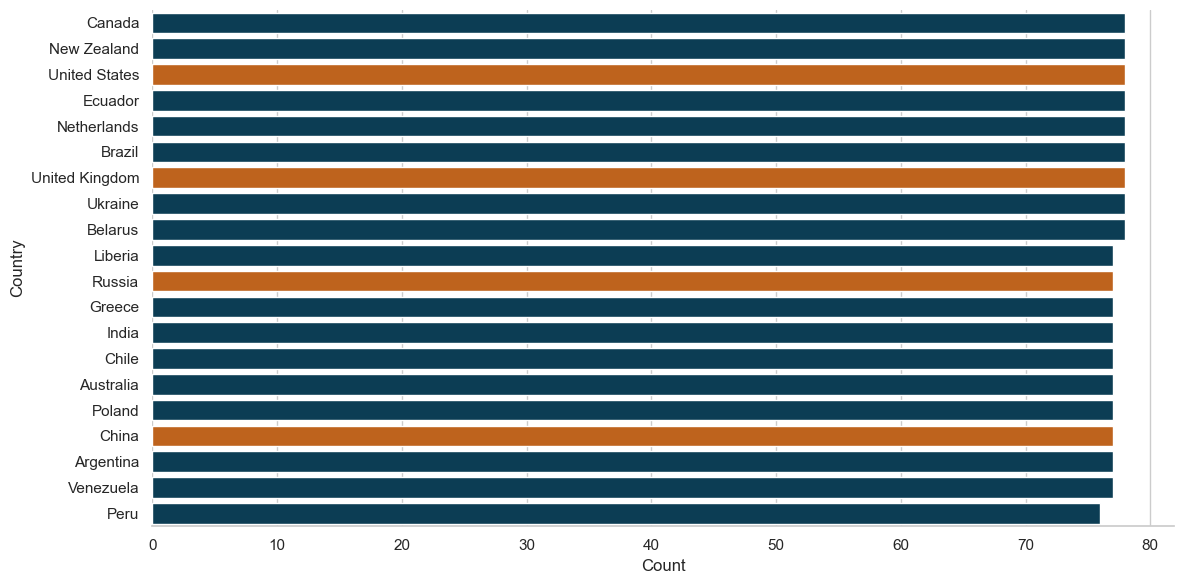

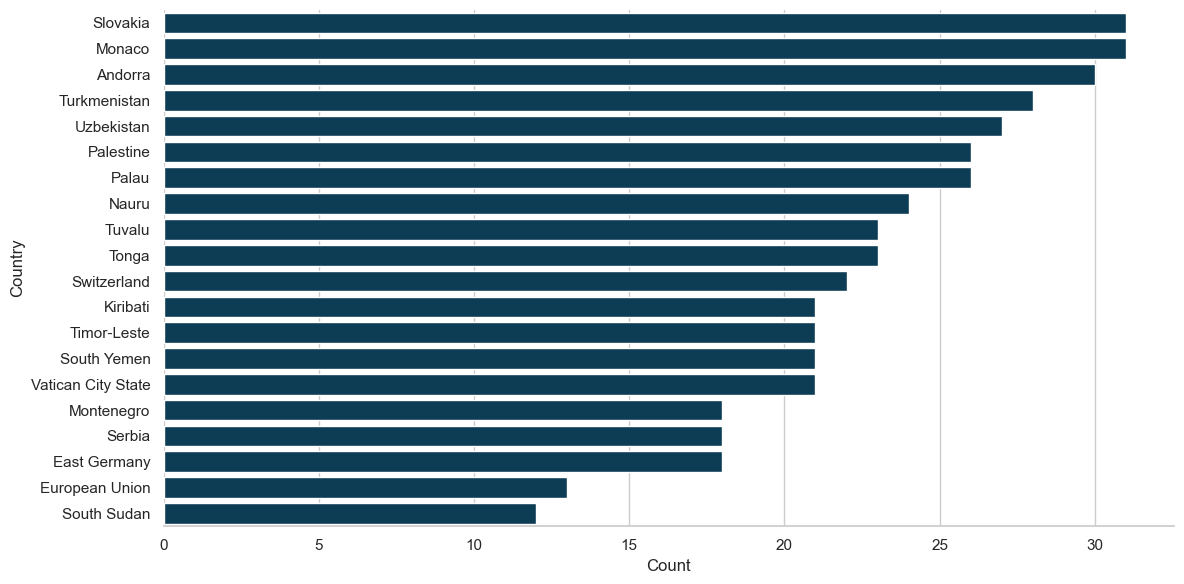

In [132]:
# Set Seaborn style
sns.set(style="whitegrid")

# Graph 1: Top 20 Countries by Frequency
top_countries = un_corpus_scored['country_name'].value_counts().nlargest(20)

country_security_status = (
    un_corpus_scored.groupby('country_name')['security_council_permanent']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 0)
    .reindex(top_countries.index)
)

# Assign colors: red if permanent member, blue otherwise
colors = ['#D95F02' if status == 1 else '#004260' for status in country_security_status]


plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)
plt.xlabel("Count")
plt.ylabel("Country")
sns.despine(left=True, right=True, top=True, bottom=False)
plt.tight_layout(rect=[0, 0, 1, 1])
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)

plt.savefig(os.path.join(fig_dir, 'top_20_countries_by_frequency.png'))
plt.show()

# Graph 2: Bottom 15 Countries by Frequency
bottom_countries = un_corpus_scored['country_name'].value_counts().nsmallest(20)
bottom_countries = bottom_countries.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, color='#004260')
plt.xlabel("Count")
plt.ylabel("Country")
sns.despine(left=True, right=True, top=True, bottom=False)
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig(os.path.join(fig_dir, 'bottom_20_countries_by_frequency.png'))
plt.show()

### Graphs 4 & 5 : Longest and Shortest Speeches by Word Count

In [134]:
dupes = un_corpus_scored['speech_label'].duplicated().sum()
print(f"Number of duplicated speech_label values: {dupes}")

dupe_labels = un_corpus_scored[un_corpus_scored['speech_label'].duplicated(keep=False)]
print(dupe_labels[['speech_label', 'speech_length_words', 'filename', 'speech']].head(20))

Number of duplicated speech_label values: 0
Empty DataFrame
Columns: [speech_label, speech_length_words, filename, speech]
Index: []


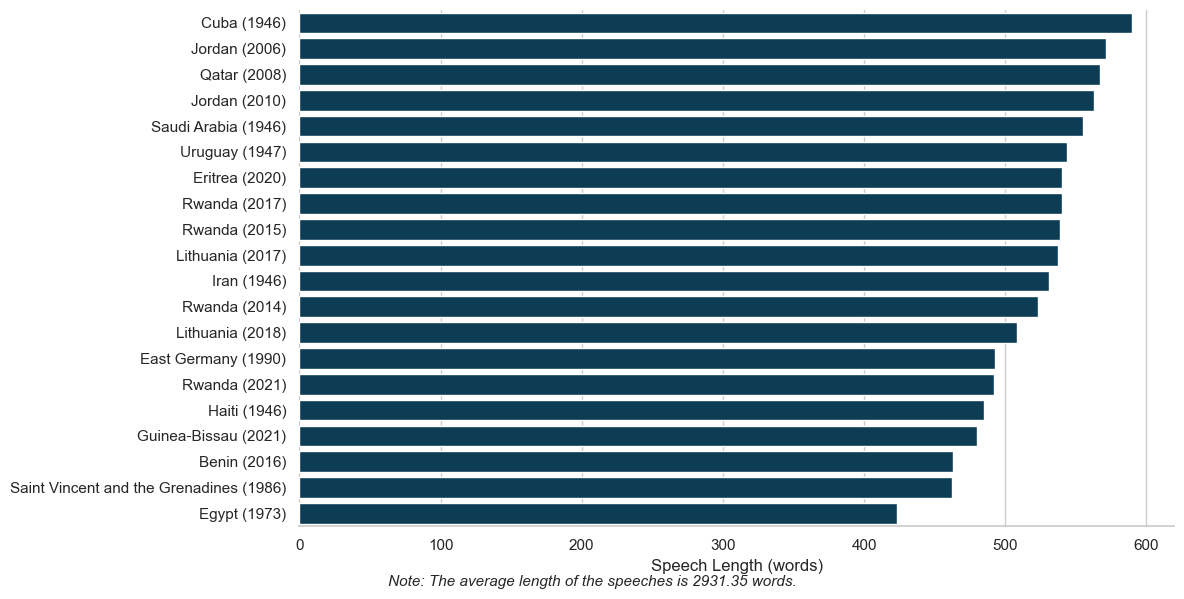

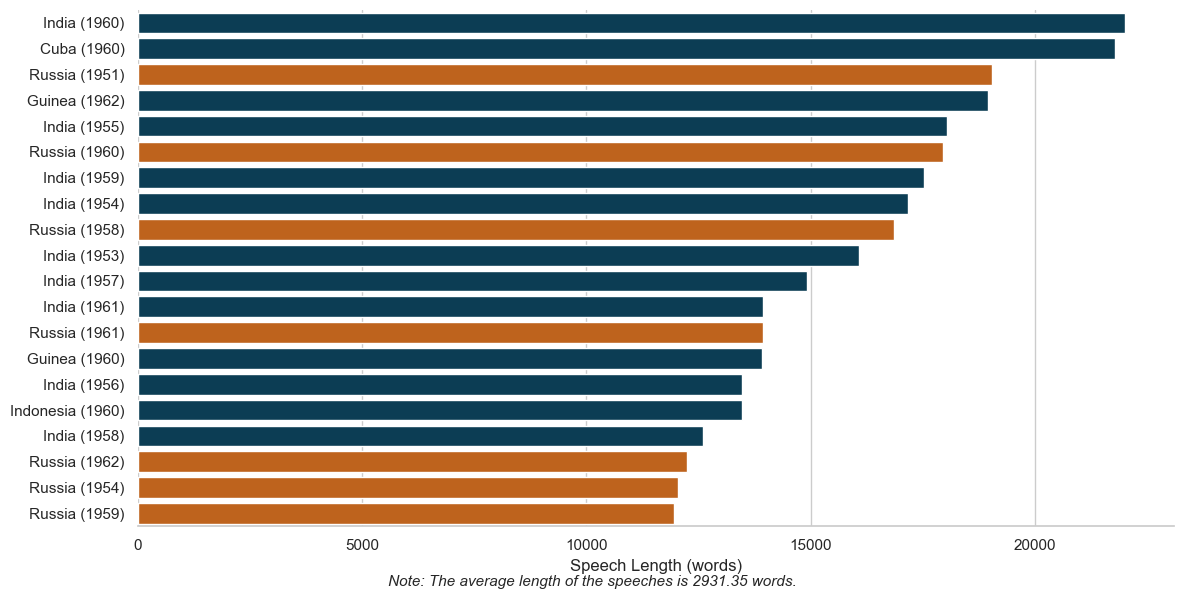

In [135]:
# Graph 4: 20 Shortest Speeches
shortest_speeches = (
    un_corpus_scored.nsmallest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words']]
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=shortest_speeches,
    x='speech_length_words',
    y='speech_label',
    color='#004260'
)
plt.xlabel("Speech Length (words)")
plt.ylabel("")
sns.despine(left=True, right=True, top=True, bottom=False)
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.figtext(0.5, 0.01, "Note: The average length of the speeches is 2931.35 words.", ha="center", fontsize=11, style='italic')

plt.savefig(os.path.join(fig_dir, '20_shortest_speeches.png'))
plt.show()


# Graph 5: 20 Longest Speeches
longest_speeches = (
    un_corpus_scored.nlargest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words', 'country_name', 'security_council_permanent']]
)

# Assign colors: red if permanent member, blue otherwise
colors_longest_speeches = ['#D95F02' if status == 1 else '#004260' 
          for status in longest_speeches['security_council_permanent']]

plt.figure(figsize=(12, 6))
sns.barplot(
    data=longest_speeches,
    x='speech_length_words',
    y='speech_label',
    palette=colors_longest_speeches
)
plt.xlabel("Speech Length (words)")
plt.ylabel("")
sns.despine(left=True, right=True, top=True, bottom=False)
plt.tight_layout(rect=[0, 0, 1, 1])
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)

plt.figtext(0.5, 0.01, "Note: The average length of the speeches is 2931.35 words.", ha="center", fontsize=11, style='italic')


plt.savefig(os.path.join(fig_dir, '20_longest_speeches.png'))
plt.show()


### Graph 6: Percentage of Speeches from Countries with English as Official Language

Sample size: 10760


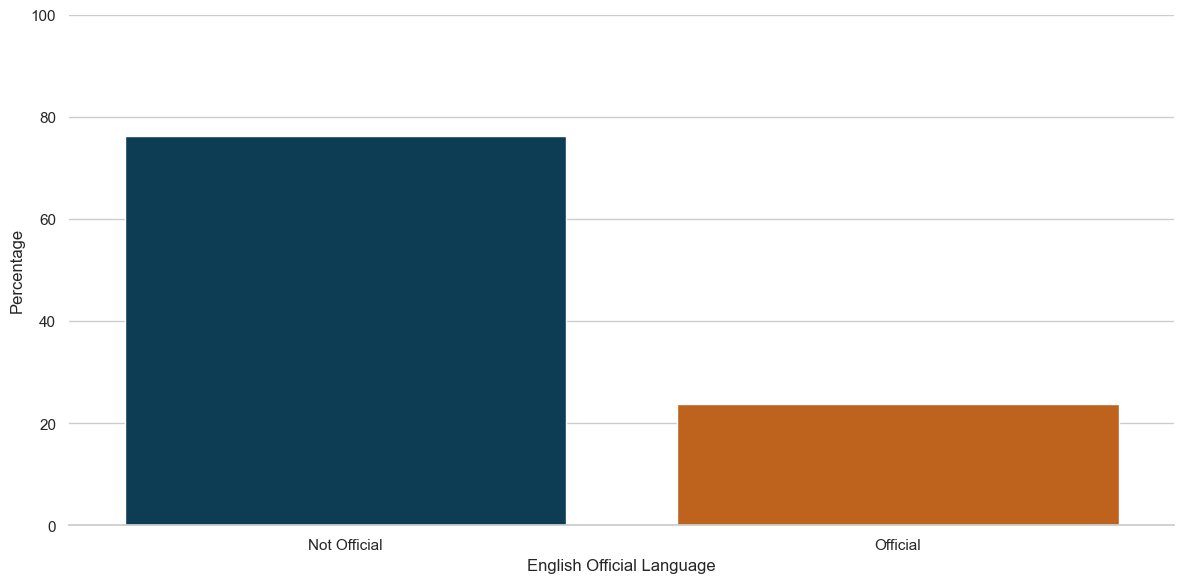

In [137]:
sns.set(style="whitegrid")

# Count and normalize to get percentages
eng_counts = un_corpus_scored['english_official_language'].value_counts(normalize=True).sort_index() * 100

total_n = un_corpus_scored['english_official_language'].notna().sum()
print(f"Sample size: {total_n}")

# Define labels
eng_labels = ['Not Official', 'Official']

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=eng_labels, y=eng_counts.values, palette=['#004260', '#D95F02'])

plt.ylabel("Percentage")
plt.xlabel("English Official Language")
plt.ylim(0, 100)  # Optional: force axis to max out at 100%
sns.despine(left=True, right=True, top=True, bottom=False)
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.15)
plt.tight_layout(rect=[0, 0, 1, 1])


plt.savefig(os.path.join(fig_dir, 'english_official_language_percentage.png'))
plt.show()

### Graph 7: Share of female speakers

Sample size: 4704


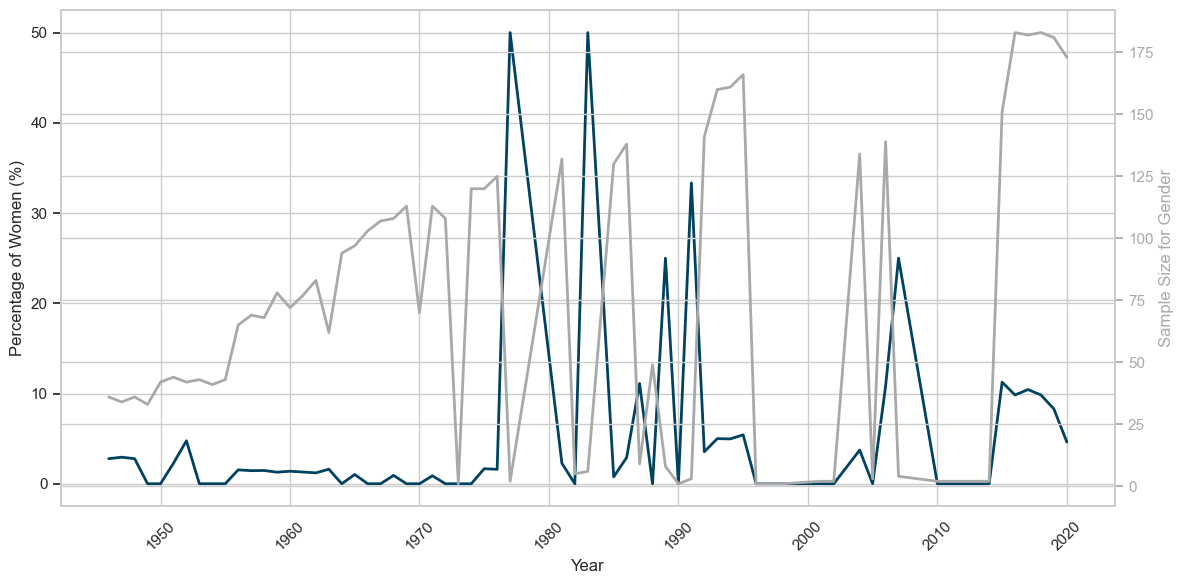

In [139]:
# Filter to only 0 and 1 (exclude NaNs)
df_gender = un_corpus_scored[un_corpus_scored['gender_dummy'].isin([0, 1])]

# Percentage share of women per year
female_percent = df_gender.groupby('year')['gender_dummy'].mean() * 100

# Sample size per year
sample_size = df_gender.groupby('year')['gender_dummy'].count()

# Total sample size included in the plot
total_n = sample_size.sum()
print(f"Sample size: {total_n}")

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: percentage of women
sns.lineplot(
    x=female_percent.index,
    y=female_percent.values,
    color='#004260',
    linewidth=2,
    ax=ax1
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Percentage of Women (%)")
ax1.tick_params(axis='y')

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=sample_size.index,
    y=sample_size.values,
    color='darkgrey',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Sample Size for Gender", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')

# X-axis: fixed ticks every 10 years from 1950 to 2020
tick_years = list(range(1950, 2021, 10))
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(fig_dir, 'female_speakers_percentage_by_year.png'))
plt.show()


In [140]:
nan_count = un_corpus_scored["position"].isna().sum()
print(nan_count)
sample_size_count = un_corpus_scored["position"].notna().sum()
print(sample_size_count)

4678
6082


### Graph 8: Share of position by speakers

Total sample size included in the plot: 5947


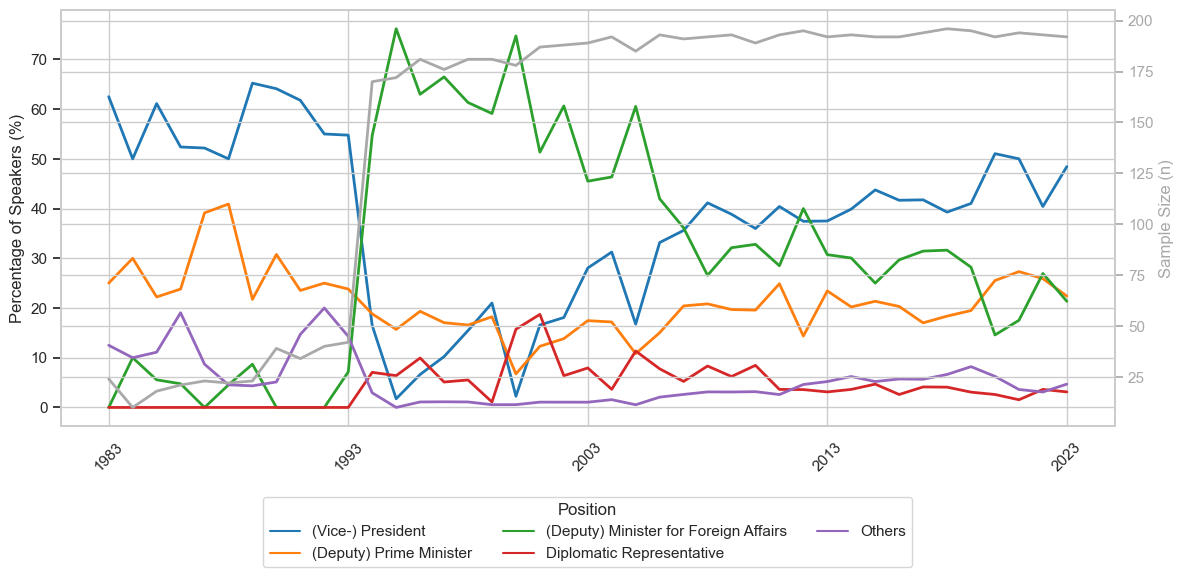

In [142]:
# === Filter data to start from first year with n >= 20 ===
start_year = sample_size_per_year[sample_size_per_year >= 20].index.min()
end_year = sample_size_per_year.index.max()

# Filter sample size and percentages
sample_size_filtered = sample_size_per_year[sample_size_per_year.index >= start_year]
position_rel_filtered = position_rel_sorted[position_rel_sorted.index >= start_year]

# Melt for Seaborn
position_rel_long_filtered = position_rel_filtered.reset_index().melt(
    id_vars='year',
    value_vars=position_rel_filtered.columns,
    var_name='position',
    value_name='percentage'
)

# Total sample size included in the plot
total_n_plot = sample_size_filtered.sum()
print(f"Total sample size included in the plot: {total_n_plot}")

# === Plot ===
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.set(style="whitegrid")

# Left y-axis: percentage of speakers
sns.lineplot(
    data=position_rel_long_filtered,
    x='year',
    y='percentage',
    hue='position',
    palette=sns.color_palette("tab10", n_colors=len(position_rel_filtered.columns)),
    linewidth=2,
    ax=ax1
)
ax1.set_ylabel("Percentage of Speakers (%)")
ax1.set_xlabel("")
ax1.tick_params(axis='y')

# Right y-axis: sample size
ax2 = ax1.twinx()
sns.lineplot(
    x=sample_size_filtered.index,
    y=sample_size_filtered.values,
    color='darkgrey',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Sample Size (n)", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')

# X-axis: ticks every 10 years within filtered range
tick_years = list(range(start_year, end_year + 1, 10))
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=45)

# Legend
ax1.legend(
    title="Position",
    loc="upper center",
    bbox_to_anchor=(0.5, -0.15),
    ncol=3
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(fig_dir, 'speaker_positions_by_year_filtered_n20.png'))
plt.show()


### Graph 9: Emotionality Scoring overall

Sample size: 10760


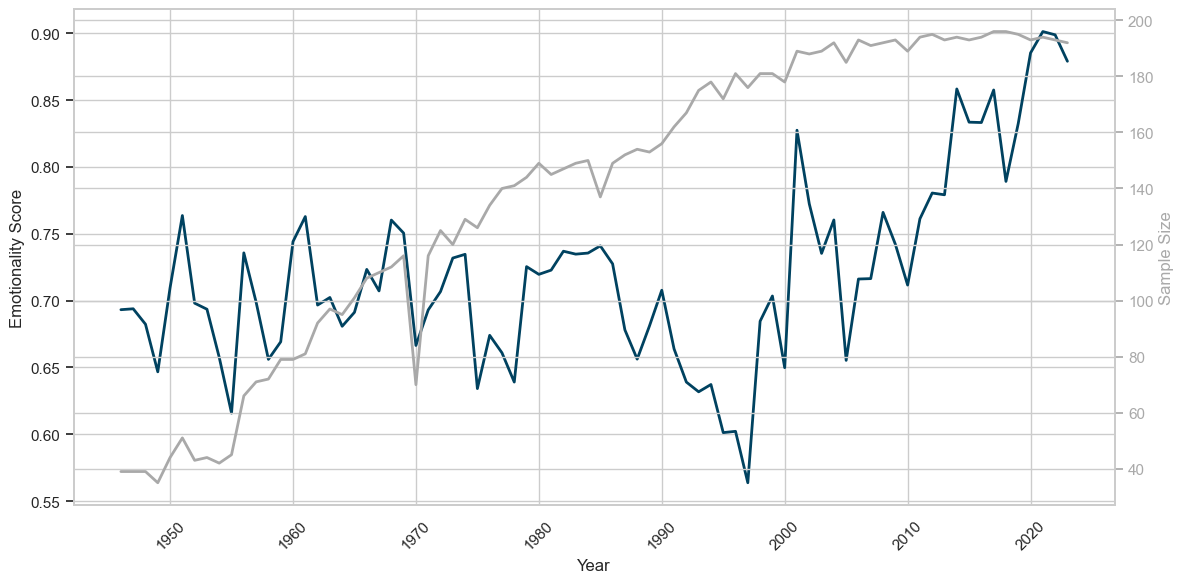

In [146]:
sns.set_style("whitegrid") 

# Sample size per year (non-missing scores)
sample_size = un_corpus_scored.groupby('year')['score'].count()

# Mean score per year
score_over_time = un_corpus_scored.groupby('year')['score'].mean()

# Total sample size
total_n = sample_size.sum()
print(f"Sample size: {total_n}")

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Left y-axis: Emotionality score
sns.lineplot(
    x=score_over_time.index,
    y=score_over_time.values,
    marker=None,
    color='#004260',
    linewidth=2,
    ax=ax1
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=sample_size.index,
    y=sample_size.values,
    color='darkgrey',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')

# X-axis: fixed ticks every 10 years from 1950 to 2020
tick_years = list(range(1950, 2021, 10))
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=45)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time.png'))
plt.show()


In [147]:
from tabulate import tabulate

score_table = (
    un_corpus_scored
    .groupby('year')['score']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean':'avg_score', 'count':'n'})
)

# Round for readability
score_table['avg_score'] = score_table['avg_score'].round(3)

# Ensure all rows are displayed
with pd.option_context('display.max_rows', None):
    display(score_table)


,year,avg_score,n
0,1946,0.693,39
1,1947,0.694,39
2,1948,0.682,39
3,1949,0.647,35
4,1950,0.710,44
5,1951,0.764,51
6,1952,0.698,43
7,1953,0.694,44
8,1954,0.658,42
9,1955,0.616,45


Total sample size: 10760


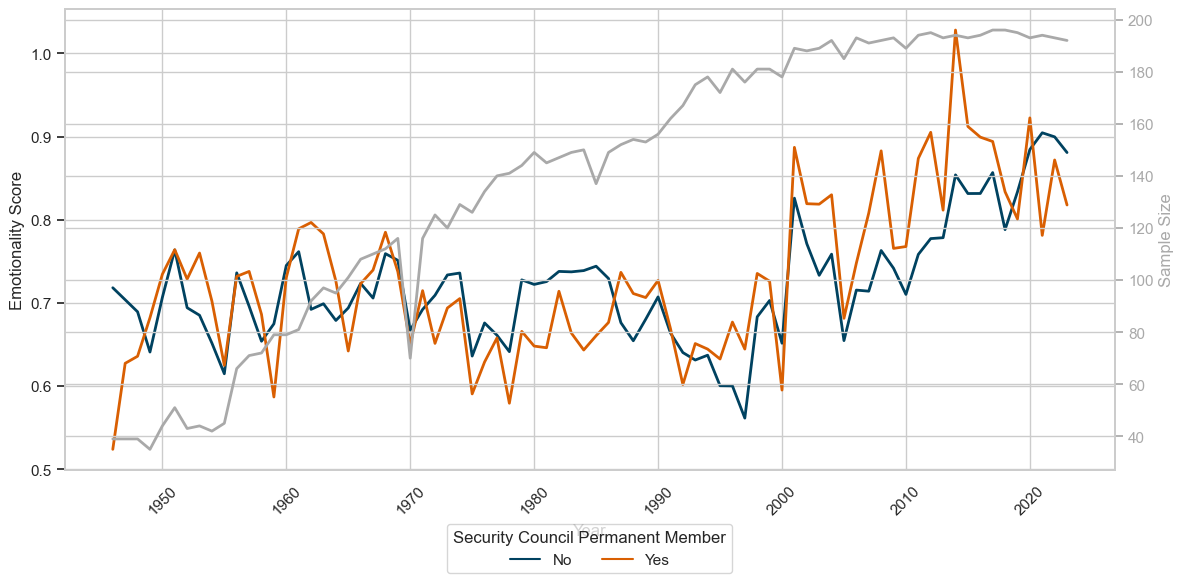

In [148]:
sns.set_style("whitegrid")

# Total sample size (non-missing score & SC membership)
total_n = un_corpus_scored[['score', 'security_council_permanent']].dropna().shape[0]
print(f"Total sample size: {total_n}")

# Mean scores by year and SC membership
score_over_time = (
    un_corpus_scored
    .groupby(['year', 'security_council_permanent'])['score']
    .mean()
    .reset_index()
)
score_over_time['security_council_permanent_label'] = score_over_time['security_council_permanent'].map({0: 'No', 1: 'Yes'})

# Sample size per year (non-missing scores)
sample_size = un_corpus_scored.groupby('year')['score'].count()

# === Plot ===
fig, ax1 = plt.subplots(figsize=(12,6))

# Left y-axis: Emotionality score by SC membership
sns.lineplot(
    data=score_over_time,
    x='year',
    y='score',
    hue='security_council_permanent_label',
    palette={'No': '#004260', 'Yes': '#D95F02'},
    linewidth=2,
    ax=ax1
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=sample_size.index,
    y=sample_size.values,
    color='darkgrey',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')

# X-axis: ticks every 10 years
tick_years = list(range(1950, 2021, 10))
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=45)

# Legend
ax1.legend(
    title="Security Council Permanent Member",
    loc="upper center",
    bbox_to_anchor=(0.5,-0.1),
    ncol=3
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_security_council_member_with_n.png'))
plt.show()


Total sample size: 10760


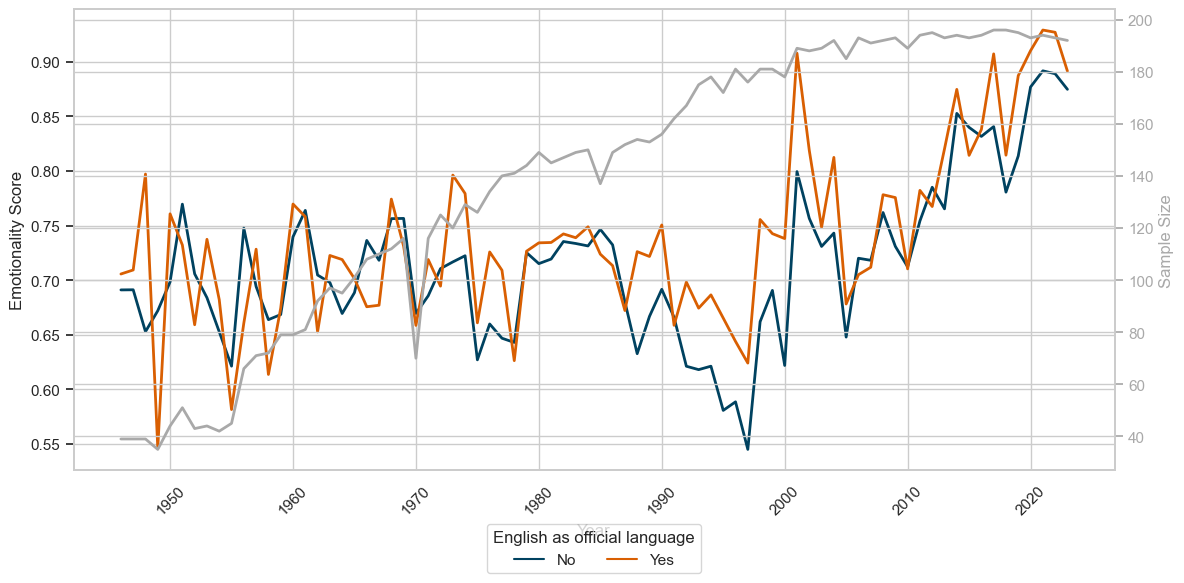

In [149]:
sns.set_style("whitegrid")

# Total sample size (non-missing score & English official language)
total_n = un_corpus_scored[['score', 'english_official_language']].dropna().shape[0]
print(f"Total sample size: {total_n}")

# Mean scores by year and English official language
score_over_time = (
    un_corpus_scored
    .groupby(['year', 'english_official_language'])['score']
    .mean()
    .reset_index()
)
score_over_time['english_label'] = score_over_time['english_official_language'].map({0: 'No', 1: 'Yes'})

# Sample size per year (non-missing scores)
sample_size = un_corpus_scored.groupby('year')['score'].count()

# === Plot ===
fig, ax1 = plt.subplots(figsize=(12,6))

# Left y-axis: Emotionality score by English official language
sns.lineplot(
    data=score_over_time,
    x='year',
    y='score',
    hue='english_label',
    palette={'No': '#004260', 'Yes': '#D95F02'},
    linewidth=2,
    ax=ax1
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=sample_size.index,
    y=sample_size.values,
    color='darkgrey',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')

# X-axis: ticks every 10 years
tick_years = list(range(1950, 2021, 10))
ax1.set_xticks(tick_years)
ax1.set_xticklabels(tick_years, rotation=45)

# Legend
ax1.legend(
    title="English as official language",
    loc="upper center",
    bbox_to_anchor=(0.5,-0.1),
    ncol=3
)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_english_official_language_with_n.png'))
plt.show()


Total sample size: 4704


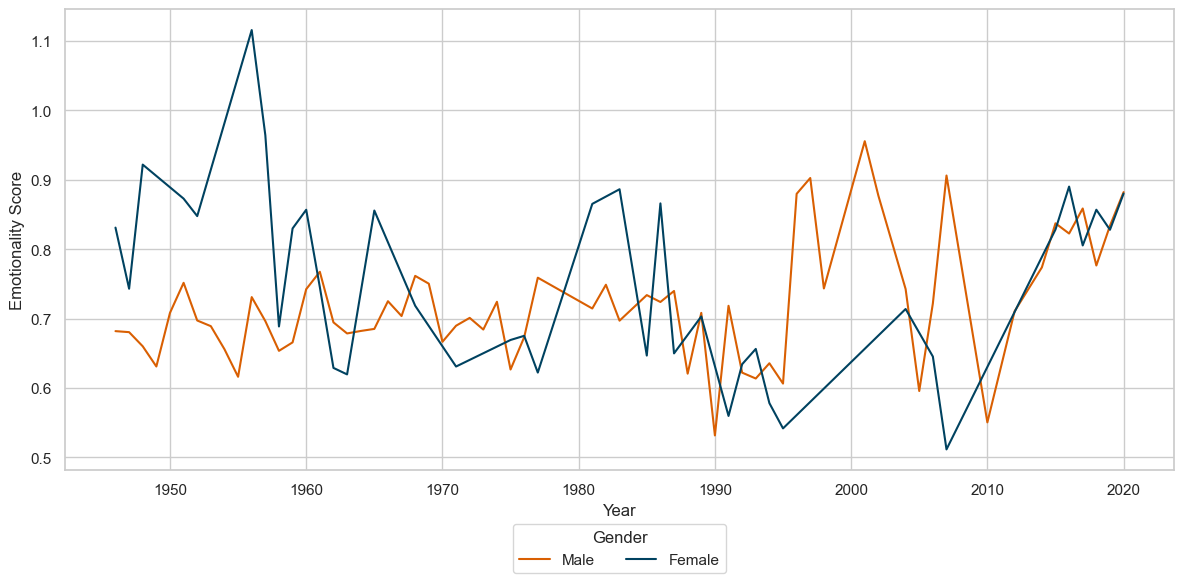

In [151]:
sns.set_style("whitegrid")

# Sample Size
total_n = un_corpus_scored[['score', 'gender_dummy']].dropna().shape[0]
print(f"Total sample size: {total_n}")

score_over_time = (
    un_corpus_scored
    .groupby(['year', 'gender_dummy'])['score']
    .mean()
    .reset_index()
)

score_over_time['gender_label'] = score_over_time['gender_dummy'].map({0.0: 'Male', 1.0: 'Female'})

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=score_over_time,
    x='year',
    y='score',
    hue='gender_label',  # two lines
    palette={'Female': '#004260', 'Male': '#D95F02'},
    marker=None
)
plt.xlabel('Year')
plt.ylabel('Emotionality Score')
#sns.despine(left=True, right=True, top=True, bottom=True)
plt.grid(True)

# Access the current legend and just update the title
plt.legend(title='Gender', loc="upper center",
          bbox_to_anchor=(0.5,-0.1),
          ncol = 3)

plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_gender.png'))
plt.show()

Total sample size: 6082


C:\Users\sarah\AppData\Local\Temp\ipykernel_33284\354021339.py:22: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.lineplot(


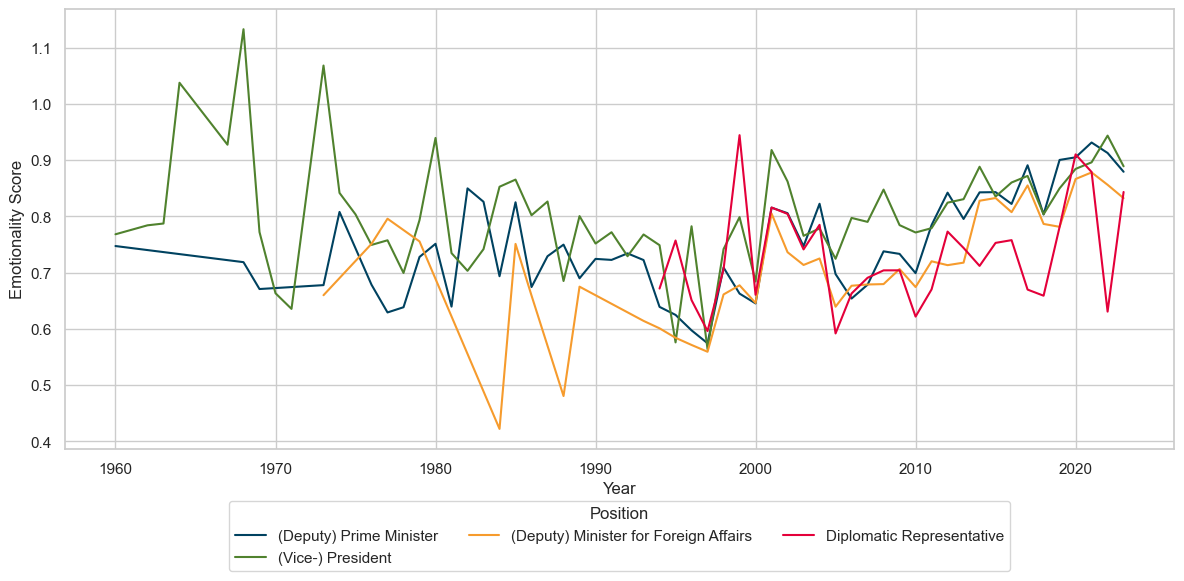

In [173]:
sns.set_style("whitegrid")

# Sample Size
total_n = un_corpus_merged[['score', 'position']].dropna().shape[0]
print(f"Total sample size: {total_n}")

# Group by year and position instead of security_council_permanent
score_over_time = (
    un_corpus_merged
    .groupby(['year', 'position'])['score']
    .mean()
    .reset_index()
)

score_over_time = score_over_time[score_over_time['position'] != "Others"]

# Optional: ensure position is treated as string or clean labels
score_over_time['position'] = score_over_time['position'].astype(str)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(
    data=score_over_time,
    x='year',
    y='score',
    hue='position',  # now lines by position
    marker=None,
    palette=custom_colors
    
)

plt.xlabel('Year')
plt.ylabel('Emotionality Score')
plt.grid(True)

# Legend
plt.legend(title='Position', loc="upper center",
          bbox_to_anchor=(0.5,-0.1),
          ncol=3)

plt.tight_layout(rect=[0, 0, 1, 1])

plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_position.png'))
plt.show()

In [153]:
# Count speeches per year and position
counts_per_year = (
    un_corpus_scored
    .groupby(['year', 'position'])
    .size()
    .reset_index(name='count')
)

# Drop "Others"
counts_per_year = counts_per_year[counts_per_year['position'] != "Others"]

# Pivot into a wide table for readability
counts_pivot = (
    counts_per_year
    .pivot(index='year', columns='position', values='count')
    .fillna(0)
    .astype(int)
)

# Display nicely
from IPython.display import display
display(counts_pivot)



position,(Deputy) Minister for Foreign Affairs,(Deputy) Prime Minister,(Vice-) President,Diplomatic Representative,Head of Government,Head of State,Monarch
year,,,,,,,
1954,0,0,0,0,0,0,1
1960,0,6,7,0,0,0,3
1962,0,0,2,0,0,0,0
1963,0,0,1,0,0,0,1
1964,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...
2019,55,38,80,6,4,3,5
2020,28,49,98,5,3,1,5
2021,34,53,97,3,0,0,4


### Wordcloud with the most common words

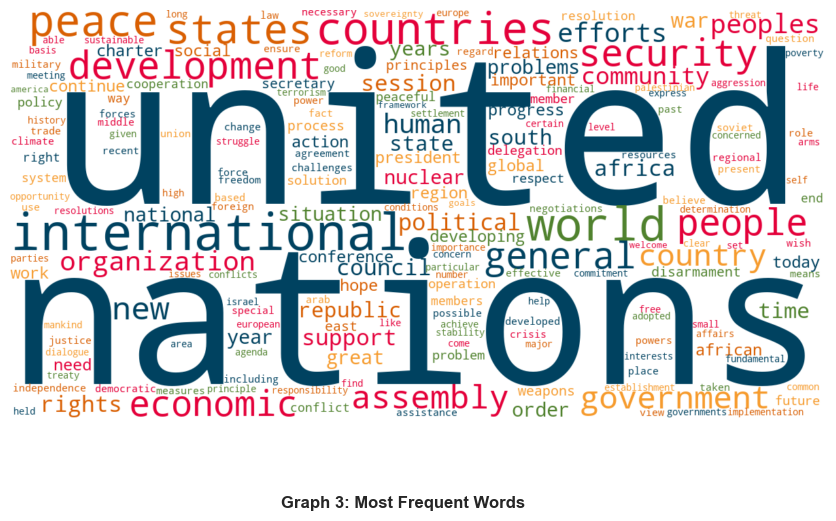

In [155]:
# == Graph 4: Most Frequent Words ==

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    colormap=custom_cmap,
    max_words=200,
    contour_color='steelblue',
    contour_width=2,
    prefer_horizontal=1.0,
    margin=0
).generate_from_frequencies(word_counts_wordcloud)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplots_adjust(bottom=0.20)  # Create space at bottom
plt.figtext(0.5, 0.05, "Graph 3: Most Frequent Words", ha='center', fontsize=12, weight='bold')

plt.savefig(os.path.join(fig_dir, 'most_frequent_words.png'), bbox_inches='tight', pad_inches=0)
plt.show()


In [206]:
affect_out_path = os.path.join(data_freq, "affect_words.txt")
cog_out_path = os.path.join(data_freq, "cog_words.txt")

def load_words(file_path):
    with open(file_path, 'r') as f:
        content = f.read()

    tokens = content.strip().split()
    words = tokens[::2]
    counts = tokens[1::2]
    counts = [int(c.strip('(),')) for c in counts]
    df = pd.DataFrame({'word': words, 'count': counts})
    return df

# Load top 10 words from each dictionary
affect_df = load_words(affect_out_path).nlargest(10, 'count').reset_index(drop=True)
cog_df = load_words(cog_out_path).nlargest(10, 'count').reset_index(drop=True)

# Pad the smaller dataframe if needed (in case counts differ)
max_len = max(len(affect_df), len(cog_df))
affect_df = affect_df.reindex(range(max_len))
cog_df = cog_df.reindex(range(max_len))

# Combine into one dataframe with 4 columns
combined_df = pd.DataFrame({
    'Affect Dictionary': affect_df['word'],
    'Frequency ': affect_df['count'],
    'Cognition Dictionary': cog_df['word'],
    'Frequency': cog_df['count']
})

fig_plot, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=combined_df.fillna('').values,
                 colLabels=combined_df.columns,
                 cellLoc='center',
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)

# Add caption below the table
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.get_text().set_weight('bold')
plt.subplots_adjust(bottom=0.2)  # make space at the bottom
fig_plot.text(0.5, 0.05, 'Table 1: Highest frequencies from affection and cognition dictionaries', 
         ha='center', fontsize=14, weight='bold')

plt.tight_layout(rect=[0, 0.1, 1, 1])  # leave bottom margin for caption
plt.savefig(os.path.join(fig_dir, 'top10_affect_cognition_combined.png'))

plt.close()
